k近邻算法：
- 思想极度简单
- 应用数学知识少
- 效果好
- 可以解释机器学习算法使用过程中的很多细节问题
- 更完整的刻画机器学习应用的流程

## kNN 基础

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
raw_data_X = [[3.393533211, 2.331273381],
              [3.110073483, 1.781539638],
              [1.343808831, 3.368360954],
              [3.582294042, 4.679179110],
              [2.280362439, 2.866990263],
              [7.423436942, 4.696522875],
              [5.745051997, 3.533989803],
              [9.172168622, 2.511101045],
              [7.792783481, 3.424088941],
              [7.939820817, 0.791637231]
             ]
raw_data_y = [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]

In [3]:
X_train = np.array(raw_data_X)
y_train = np.array(raw_data_y)

In [4]:
X_train

array([[3.39353321, 2.33127338],
       [3.11007348, 1.78153964],
       [1.34380883, 3.36836095],
       [3.58229404, 4.67917911],
       [2.28036244, 2.86699026],
       [7.42343694, 4.69652288],
       [5.745052  , 3.5339898 ],
       [9.17216862, 2.51110105],
       [7.79278348, 3.42408894],
       [7.93982082, 0.79163723]])

In [5]:
y_train

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

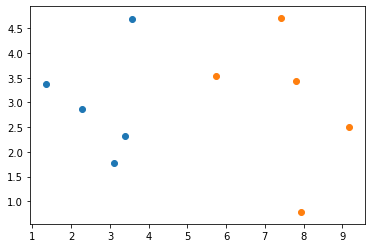

In [6]:
plt.scatter(X_train[y_train==0,0],X_train[y_train==0,1])
plt.scatter(X_train[y_train==1,0],X_train[y_train==1,1])
plt.show()

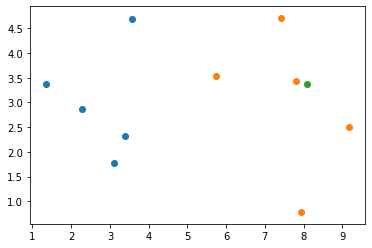

In [7]:
x = np.array([8.093607318, 3.365731514])
plt.scatter(X_train[y_train==0,0],X_train[y_train==0,1])
plt.scatter(X_train[y_train==1,0],X_train[y_train==1,1])
plt.scatter(x[0],x[1])
plt.show()

## kNN的过程

In [9]:
from math import sqrt
distance = []
for x_train in X_train:
    d = sqrt(np.sum((x_train - x) ** 2))
    distance.append(d)

In [10]:
distance

[4.812566907609877,
 5.229270827235305,
 6.749798999160064,
 4.6986266144110695,
 5.83460014556857,
 1.4900114024329525,
 2.354574897431513,
 1.3761132675144652,
 0.3064319992975,
 2.5786840957478887]

In [11]:
distance = [sqrt(np.sum((x_train - x) ** 2)) for x_train in X_train]

In [12]:
distance

[4.812566907609877,
 5.229270827235305,
 6.749798999160064,
 4.6986266144110695,
 5.83460014556857,
 1.4900114024329525,
 2.354574897431513,
 1.3761132675144652,
 0.3064319992975,
 2.5786840957478887]

In [13]:
np.argsort(distance)

array([8, 7, 5, 6, 9, 3, 0, 1, 4, 2], dtype=int64)

In [14]:
nearest = np.argsort(distance)

In [15]:
k = 6

In [16]:
topK_y = [y_train[i] for i in nearest[:k]]

In [17]:
topK_y

[1, 1, 1, 1, 1, 0]

In [18]:
from collections import Counter
Counter(topK_y)

Counter({1: 5, 0: 1})

In [19]:
votes = Counter(topK_y)

In [20]:
votes.most_common(2)

[(1, 5), (0, 1)]

In [22]:
votes.most_common(1)[0][0]

1

In [23]:
predict_y = votes.most_common(1)[0][0]
predict_y

1